## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  85.015538   253.391779  0.931704  3.328628  1.148994
1  15.168385  1372.198637  0.313397  1.742871  1.335936
2  29.230235  1031.698821  0.544075  8.471378  1.536174
3  66.034173   311.089664  0.440297  4.310641  1.092388
4  61.207456   836.101261  0.701800  7.899680  1.661284


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9249093	total: 57.8ms	remaining: 57.8s
1:	learn: 0.9172609	total: 58.3ms	remaining: 29.1s
2:	learn: 0.9095953	total: 58.9ms	remaining: 19.6s
3:	learn: 0.9037952	total: 59.4ms	remaining: 14.8s
4:	learn: 0.8956539	total: 59.9ms	remaining: 11.9s
5:	learn: 0.8890266	total: 60.5ms	remaining: 10s
6:	learn: 0.8801069	total: 61ms	remaining: 8.65s
7:	learn: 0.8712685	total: 61.5ms	remaining: 7.63s
8:	learn: 0.8649221	total: 61.9ms	remaining: 6.82s
9:	learn: 0.8582176	total: 62.4ms	remaining: 6.17s
10:	learn: 0.8517526	total: 62.8ms	remaining: 5.65s
11:	learn: 0.8434716	total: 63.3ms	remaining: 5.21s
12:	learn: 0.8359368	total: 63.8ms	remaining: 4.84s
13:	learn: 0.8286703	total: 64.2ms	remaining: 4.52s
14:	learn: 0.8201796	total: 64.7ms	remaining: 4.25s
15:	learn: 0.8130399	total: 65.1ms	remaining: 4s
16:	learn: 0.8065542	total: 65.4ms	remaining: 3.78s
17:	learn: 0.7989405	total: 65.8ms	remaining: 3.59s
18:	learn: 0.7939890	total: 66.2ms	remaining: 3.42s

116:	learn: 0.3978437	total: 108ms	remaining: 814ms
117:	learn: 0.3961278	total: 109ms	remaining: 811ms
118:	learn: 0.3933222	total: 109ms	remaining: 807ms
119:	learn: 0.3904520	total: 110ms	remaining: 803ms
120:	learn: 0.3887271	total: 110ms	remaining: 798ms
121:	learn: 0.3867924	total: 110ms	remaining: 793ms
122:	learn: 0.3842056	total: 111ms	remaining: 789ms
123:	learn: 0.3811587	total: 111ms	remaining: 785ms
124:	learn: 0.3784433	total: 111ms	remaining: 780ms
125:	learn: 0.3762792	total: 112ms	remaining: 776ms
126:	learn: 0.3743662	total: 112ms	remaining: 772ms
127:	learn: 0.3727666	total: 113ms	remaining: 768ms
128:	learn: 0.3704149	total: 113ms	remaining: 764ms
129:	learn: 0.3683151	total: 114ms	remaining: 761ms
130:	learn: 0.3660740	total: 114ms	remaining: 757ms
131:	learn: 0.3640344	total: 114ms	remaining: 752ms
132:	learn: 0.3624936	total: 115ms	remaining: 749ms
133:	learn: 0.3606477	total: 115ms	remaining: 745ms
134:	learn: 0.3587000	total: 116ms	remaining: 742ms
135:	learn: 

289:	learn: 0.1853764	total: 186ms	remaining: 455ms
290:	learn: 0.1848757	total: 186ms	remaining: 454ms
291:	learn: 0.1843506	total: 187ms	remaining: 453ms
292:	learn: 0.1833623	total: 187ms	remaining: 452ms
293:	learn: 0.1826159	total: 188ms	remaining: 451ms
294:	learn: 0.1820438	total: 188ms	remaining: 450ms
295:	learn: 0.1815337	total: 188ms	remaining: 448ms
296:	learn: 0.1805675	total: 189ms	remaining: 447ms
297:	learn: 0.1800763	total: 189ms	remaining: 446ms
298:	learn: 0.1796288	total: 190ms	remaining: 445ms
299:	learn: 0.1791612	total: 190ms	remaining: 444ms
300:	learn: 0.1787069	total: 191ms	remaining: 443ms
301:	learn: 0.1774495	total: 191ms	remaining: 442ms
302:	learn: 0.1767656	total: 192ms	remaining: 441ms
303:	learn: 0.1757923	total: 192ms	remaining: 440ms
304:	learn: 0.1751234	total: 192ms	remaining: 439ms
305:	learn: 0.1740556	total: 193ms	remaining: 438ms
306:	learn: 0.1731019	total: 193ms	remaining: 436ms
307:	learn: 0.1724552	total: 194ms	remaining: 435ms
308:	learn: 

526:	learn: 0.0911138	total: 290ms	remaining: 260ms
527:	learn: 0.0909439	total: 290ms	remaining: 260ms
528:	learn: 0.0907519	total: 291ms	remaining: 259ms
529:	learn: 0.0905096	total: 291ms	remaining: 258ms
530:	learn: 0.0903232	total: 292ms	remaining: 258ms
531:	learn: 0.0901014	total: 292ms	remaining: 257ms
532:	learn: 0.0896673	total: 292ms	remaining: 256ms
533:	learn: 0.0894797	total: 293ms	remaining: 255ms
534:	learn: 0.0890564	total: 293ms	remaining: 255ms
535:	learn: 0.0889203	total: 294ms	remaining: 254ms
536:	learn: 0.0887762	total: 294ms	remaining: 254ms
537:	learn: 0.0884389	total: 295ms	remaining: 253ms
538:	learn: 0.0883001	total: 296ms	remaining: 253ms
539:	learn: 0.0881183	total: 296ms	remaining: 252ms
540:	learn: 0.0879361	total: 297ms	remaining: 252ms
541:	learn: 0.0875627	total: 297ms	remaining: 251ms
542:	learn: 0.0873820	total: 298ms	remaining: 250ms
543:	learn: 0.0872048	total: 298ms	remaining: 250ms
544:	learn: 0.0870439	total: 299ms	remaining: 249ms
545:	learn: 

704:	learn: 0.0567549	total: 367ms	remaining: 153ms
705:	learn: 0.0566258	total: 367ms	remaining: 153ms
706:	learn: 0.0564512	total: 368ms	remaining: 152ms
707:	learn: 0.0564037	total: 368ms	remaining: 152ms
708:	learn: 0.0562330	total: 368ms	remaining: 151ms
709:	learn: 0.0561897	total: 369ms	remaining: 151ms
710:	learn: 0.0560653	total: 369ms	remaining: 150ms
711:	learn: 0.0560231	total: 369ms	remaining: 149ms
712:	learn: 0.0559816	total: 370ms	remaining: 149ms
713:	learn: 0.0557245	total: 370ms	remaining: 148ms
714:	learn: 0.0556097	total: 371ms	remaining: 148ms
715:	learn: 0.0555691	total: 371ms	remaining: 147ms
716:	learn: 0.0555260	total: 372ms	remaining: 147ms
717:	learn: 0.0554868	total: 372ms	remaining: 146ms
718:	learn: 0.0554475	total: 372ms	remaining: 145ms
719:	learn: 0.0553356	total: 373ms	remaining: 145ms
720:	learn: 0.0552970	total: 373ms	remaining: 144ms
721:	learn: 0.0552592	total: 374ms	remaining: 144ms
722:	learn: 0.0551497	total: 374ms	remaining: 143ms
723:	learn: 

941:	learn: 0.0389916	total: 471ms	remaining: 29ms
942:	learn: 0.0388761	total: 472ms	remaining: 28.5ms
943:	learn: 0.0388607	total: 472ms	remaining: 28ms
944:	learn: 0.0388124	total: 472ms	remaining: 27.5ms
945:	learn: 0.0387647	total: 473ms	remaining: 27ms
946:	learn: 0.0387496	total: 473ms	remaining: 26.5ms
947:	learn: 0.0387025	total: 473ms	remaining: 26ms
948:	learn: 0.0385693	total: 474ms	remaining: 25.5ms
949:	learn: 0.0385308	total: 474ms	remaining: 25ms
950:	learn: 0.0385014	total: 475ms	remaining: 24.5ms
951:	learn: 0.0383896	total: 475ms	remaining: 24ms
952:	learn: 0.0381804	total: 475ms	remaining: 23.4ms
953:	learn: 0.0381349	total: 476ms	remaining: 22.9ms
954:	learn: 0.0380803	total: 476ms	remaining: 22.4ms
955:	learn: 0.0380422	total: 477ms	remaining: 21.9ms
956:	learn: 0.0379708	total: 477ms	remaining: 21.4ms
957:	learn: 0.0379332	total: 478ms	remaining: 20.9ms
958:	learn: 0.0378627	total: 478ms	remaining: 20.4ms
959:	learn: 0.0378254	total: 478ms	remaining: 19.9ms
960:	

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

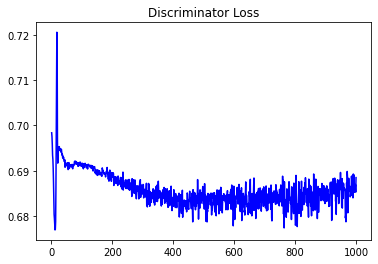

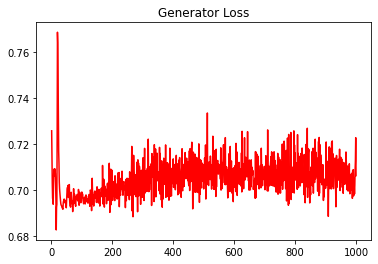

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.19586994766615454


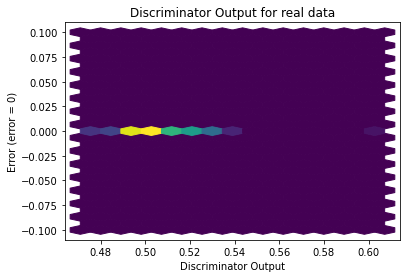

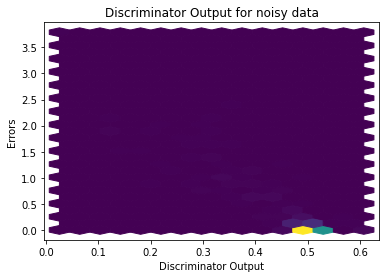

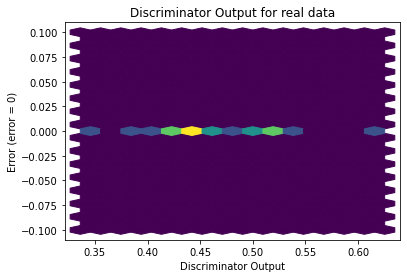

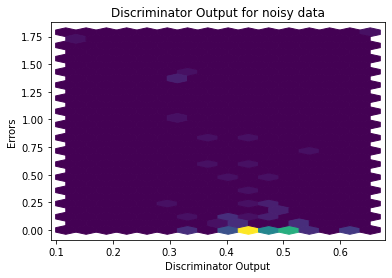

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


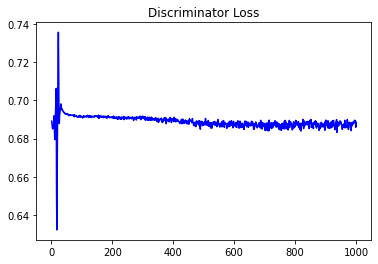

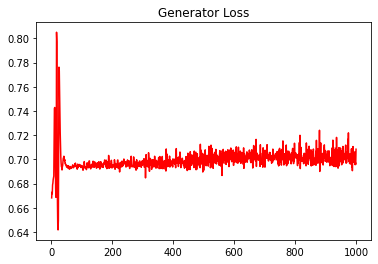

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.30447677974956383


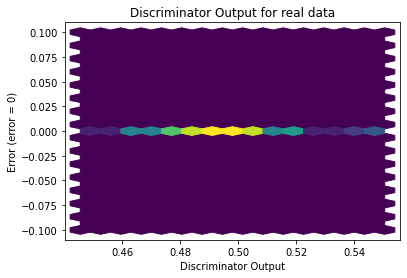

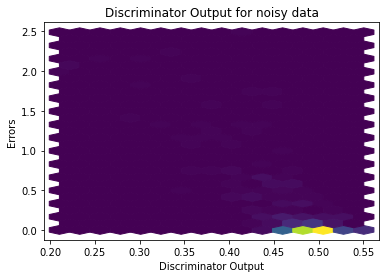

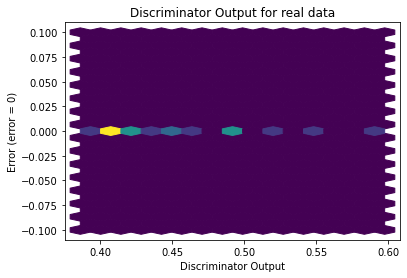

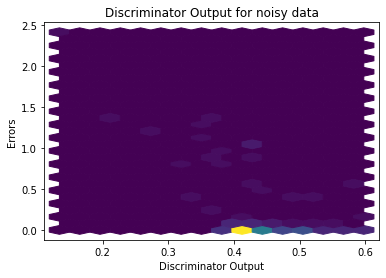

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9473]], requires_grad=True)
